In [1]:
import tensorflow as tf
import time

import numpy as np # linear algebra
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

#load MNIST dataset 
mnist = input_data.read_data_sets("data/", one_hot=True)

W1012 11:29:23.016139 12356 deprecation.py:323] From <ipython-input-1-308a1721ee59>:10: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1012 11:29:23.019628 12356 deprecation.py:323] From C:\anaconda\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W1012 11:29:23.021126 12356 deprecation.py:323] From C:\anaconda\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement

Extracting data/train-images-idx3-ubyte.gz


W1012 11:29:23.227343 12356 deprecation.py:323] From C:\anaconda\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W1012 11:29:23.229556 12356 deprecation.py:323] From C:\anaconda\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W1012 11:29:23.266256 12356 deprecation.py:323] From C:\anaconda\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please 

Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [21]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 35s 0us/step


In [27]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

# Q1
#### (a)The number of parameters we are trying to learn=784*400+400+400*200+200+200*100+100+100*50+50+50*25+25+25*10+10=420885

#### (b) Use different activation functions in your architecture 

#####    (1) 1st layer: sigmoid, 2nd layer: tanh, 3rd layer: reLU, 4th layer: sigmoid, 5th layer: leaky reLU


In [2]:
learning_rate = 0.05

training_epochs = 100
batch_size = 50

display_step = 2

#Network Architecture
n_hidden_1 = 400
n_hidden_2 = 200
n_hidden_3 = 100
n_hidden_4 = 50
n_hidden_5 = 25

#MNIST data image of shape 28*28=784
input_size = 784
# 0-9 digits recognition (labels)
output_size = 10

In [3]:
def layer(x, weight_shape, bias_shape, act):
    w_std = (2.0/weight_shape[0])**0.5
    w_0 = tf.random_normal_initializer(stddev=w_std)
    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    #print('Weight Matrix:', W)
    #print('Bias Vector:', b)
    if act == 'linear':
        return tf.matmul(x, W) + b
    elif act == 'tanh':
        return tf.nn.tanh(tf.matmul(x, W) + b)
    elif act == 'sigmoid':
        return tf.nn.sigmoid(tf.matmul(x, W) + b)
    elif act == 'relu':
        return tf.nn.relu(tf.matmul(x, W) + b)
    elif act == 'leaky relu':
        return tf.nn.leaky_relu(tf.matmul(x, W) + b)
    else:
        return tf.nn.relu(tf.matmul(x, W) + b)

In [4]:
def inference(x, act):
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layer(x, [input_size, n_hidden_1], [n_hidden_1], act[0])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layer(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2], act[1])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layer(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3], act[2])
        #print([n_hidden_2, n_hidden_3])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layer(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4], act[3])
        #print([n_hidden_3, n_hidden_4])
        
    with tf.variable_scope("hidden_layer_5"):
        hidden_5 = layer(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5], act[4])
        #print([n_hidden_4, n_hidden_5])
     
    with tf.variable_scope("output"):
        output = layer(hidden_5, [n_hidden_5, output_size], [output_size], act[5])
        #print([n_hidden_5, output_size])

    return output

In [5]:
def loss_2(output, y):
    xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=output, labels=y)
    loss = tf.reduce_mean(xentropy)

    return loss

In [6]:
def training(cost, global_step, optz):

    tf.summary.scalar("cost", cost)
    if optz == 'gradient':
        optimizer = tf.train.GradientDescentOptimizer(learning_rate)
        train_op = optimizer.minimize(cost, global_step=global_step)

    if optz == 'adam':
        optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(cost, global_step=global_step)
        
    if optz == 'adadelta':
        optimizer = tf.train.AdadeltaOptimizer(learning_rate=1)
        train_op = optimizer.minimize(cost, global_step=global_step)

    return train_op

In [7]:
def evaluate(output, y):
 
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    tf.summary.scalar("validation_error", (1.0 - accuracy))

    return accuracy

In [8]:
if __name__ == '__main__':
    
    start_time = time.time()
    log_files_path = 'C:/Users/Yanxin Zhang/logs/'
    act_fn = ['sigmoid', 'tanh', 'relu', 'sigmoid', 'leaky relu', 'sigmoid']
    with tf.Graph().as_default():        
        with tf.variable_scope("HW2_1b1"):
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition


            output = inference(x, act_fn)
            cost = loss_2(output, y)
            
            global_step = tf.Variable(0, name='global_step', trainable=False)      
            train_op = training(cost, global_step,'gradient')
            eval_op = evaluate(output, y)
            summary_op = tf.summary.merge_all()
    
            saver = tf.train.Saver()
            config = tf.ConfigProto()
            config.gpu_options.allow_growth = True
            sess = tf.Session(config=config)
            
            summary_writer = tf.summary.FileWriter(log_files_path+'HW2_1b1/', sess.graph) 
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            loss_trace_1b1 = []
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
                for i in range(total_batch):
                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    # Compute average loss of all batches
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                if epoch % display_step == 0:
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace_1b1.append(1-accuracy)    
                    print("Epoch:", '%03d' % (epoch+1), "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                    saver.save(sess, log_files_path+'HW2_1b1/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            

Epoch: 001 cost function= 2.0794482  Validation Error: 0.4204000234603882
Epoch: 003 cost function= 1.6859336  Validation Error: 0.33719998598098755
Epoch: 005 cost function= 1.6317503  Validation Error: 0.298799991607666
Epoch: 007 cost function= 1.6007901  Validation Error: 0.23500001430511475
Epoch: 009 cost function= 1.5799271  Validation Error: 0.19880002737045288


W1012 08:56:37.234492 10356 deprecation.py:323] From C:\anaconda\lib\site-packages\tensorflow\python\training\saver.py:960: remove_checkpoint (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to delete files with this prefix.


Epoch: 011 cost function= 1.5645644  Validation Error: 0.15799999237060547
Epoch: 013 cost function= 1.5481083  Validation Error: 0.13999998569488525
Epoch: 015 cost function= 1.5380021  Validation Error: 0.10100001096725464
Epoch: 017 cost function= 1.5280528  Validation Error: 0.07819998264312744
Epoch: 019 cost function= 1.5213171  Validation Error: 0.071399986743927
Epoch: 021 cost function= 1.5152393  Validation Error: 0.06480002403259277
Epoch: 023 cost function= 1.5104123  Validation Error: 0.05760002136230469
Epoch: 025 cost function= 1.5065442  Validation Error: 0.055599987506866455
Epoch: 027 cost function= 1.5034455  Validation Error: 0.05739998817443848
Epoch: 029 cost function= 1.5009644  Validation Error: 0.05299997329711914
Epoch: 031 cost function= 1.4986468  Validation Error: 0.05140000581741333
Epoch: 033 cost function= 1.4969091  Validation Error: 0.04640001058578491
Epoch: 035 cost function= 1.4952233  Validation Error: 0.04640001058578491
Epoch: 037 cost function= 

##### (2) 1st layer: tanh, 2nd layer: reLU, 3rd layer: reLU, 4th layer: tanh, 5th layer: leaky reLU

In [10]:
if __name__ == '__main__':
    
    start_time = time.time()
    log_files_path = 'C:/Users/Yanxin Zhang/logs/'
    act_fn = ['tanh','relu','relu','tanh','leaky relu','sigmoid']
    with tf.Graph().as_default():        
        with tf.variable_scope("HW2_1b2"):
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition


            output = inference(x, act_fn)
            cost = loss_2(output, y)
            
            global_step = tf.Variable(0, name='global_step', trainable=False)      
            train_op = training(cost, global_step,'gradient')
            eval_op = evaluate(output, y)
            summary_op = tf.summary.merge_all()
    
            saver = tf.train.Saver()
            config = tf.ConfigProto()
            config.gpu_options.allow_growth = True
            sess = tf.Session(config=config)
            
            summary_writer = tf.summary.FileWriter(log_files_path+'HW2_1b2/', sess.graph) 
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            loss_trace_1b2 = []
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
                for i in range(total_batch):
                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    # Compute average loss of all batches
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                if epoch % display_step == 0:
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace_1b2.append(1-accuracy)    
                    print("Epoch:", '%03d' % (epoch+1), "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                    saver.save(sess, log_files_path+'HW2_1b2/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            

Epoch: 001 cost function= 1.6785722  Validation Error: 0.07679998874664307
Epoch: 003 cost function= 1.5097861  Validation Error: 0.05239999294281006
Epoch: 005 cost function= 1.4930138  Validation Error: 0.0382000207901001
Epoch: 007 cost function= 1.4851472  Validation Error: 0.03299999237060547
Epoch: 009 cost function= 1.4802049  Validation Error: 0.02920001745223999
Epoch: 011 cost function= 1.4770616  Validation Error: 0.028800010681152344
Epoch: 013 cost function= 1.4747947  Validation Error: 0.027000010013580322
Epoch: 015 cost function= 1.4731443  Validation Error: 0.02619999647140503
Epoch: 017 cost function= 1.4718033  Validation Error: 0.02319997549057007
Epoch: 019 cost function= 1.4707502  Validation Error: 0.023000001907348633
Epoch: 021 cost function= 1.4699268  Validation Error: 0.02340000867843628
Epoch: 023 cost function= 1.4693320  Validation Error: 0.021600008010864258
Epoch: 025 cost function= 1.4687838  Validation Error: 0.022000014781951904
Epoch: 027 cost funct

##### (3) 1st layer: ELU, 2nd layer: reLU, 3rd layer: reLU, 4th layer: ELU, 5th layer: leaky reLU

In [12]:
if __name__ == '__main__':
    
    start_time = time.time()
    log_files_path = 'C:/Users/Yanxin Zhang/logs/'
    act_fn = ['tanh','relu','tanh','relu','tanh','sigmoid']
    with tf.Graph().as_default():        
        with tf.variable_scope("HW2_1b3"):
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition


            output = inference(x, act_fn)
            cost = loss_2(output, y)
            
            global_step = tf.Variable(0, name='global_step', trainable=False)      
            train_op = training(cost, global_step,'gradient')
            eval_op = evaluate(output, y)
            summary_op = tf.summary.merge_all()
    
            saver = tf.train.Saver()
            config = tf.ConfigProto()
            config.gpu_options.allow_growth = True
            sess = tf.Session(config=config)
            
            summary_writer = tf.summary.FileWriter(log_files_path+'HW2_1b3/', sess.graph) 
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            loss_trace_1b3 = []
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
                for i in range(total_batch):
                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    # Compute average loss of all batches
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                if epoch % display_step == 0:
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace_1b3.append(1-accuracy)    
                    print("Epoch:", '%03d' % (epoch+1), "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                    saver.save(sess, log_files_path+'HW2_1b3/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            

Epoch: 001 cost function= 1.7561529  Validation Error: 0.08700001239776611
Epoch: 003 cost function= 1.5418655  Validation Error: 0.051599979400634766
Epoch: 005 cost function= 1.5092458  Validation Error: 0.0406000018119812
Epoch: 007 cost function= 1.4950892  Validation Error: 0.03280001878738403
Epoch: 009 cost function= 1.4873225  Validation Error: 0.03100001811981201
Epoch: 011 cost function= 1.4822047  Validation Error: 0.029399991035461426
Epoch: 013 cost function= 1.4786555  Validation Error: 0.02799999713897705
Epoch: 015 cost function= 1.4760986  Validation Error: 0.026600003242492676
Epoch: 017 cost function= 1.4742138  Validation Error: 0.02499997615814209
Epoch: 019 cost function= 1.4727762  Validation Error: 0.025399982929229736
Epoch: 021 cost function= 1.4715945  Validation Error: 0.02399998903274536
Epoch: 023 cost function= 1.4706617  Validation Error: 0.022599995136260986
Epoch: 025 cost function= 1.4699218  Validation Error: 0.024200022220611572
Epoch: 027 cost func

#### (c) for part (b) keep the same architecture, just use different optimization routine and assess its impact on accuracy
##### adam optimizer, keeping the architecture of b(1)

In [14]:
if __name__ == '__main__':
    
    start_time = time.time()
    log_files_path = 'C:/Users/Yanxin Zhang/logs/'
    act_fn = ['sigmoid', 'tanh', 'relu', 'sigmoid', 'leaky relu', 'sigmoid']
    with tf.Graph().as_default():        
        with tf.variable_scope("HW2_1c_adam_b1"):
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition


            output = inference(x, act_fn)
            cost = loss_2(output, y)
            
            global_step = tf.Variable(0, name='global_step', trainable=False)      
            train_op = training(cost, global_step,'adam')
            eval_op = evaluate(output, y)
            summary_op = tf.summary.merge_all()
    
            saver = tf.train.Saver()
            config = tf.ConfigProto()
            config.gpu_options.allow_growth = True
            sess = tf.Session(config=config)
            
            summary_writer = tf.summary.FileWriter(log_files_path+'HW2_1c_adam_b1', sess.graph) 
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            loss_trace_1c_adam_1 = []
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
                for i in range(total_batch):
                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    # Compute average loss of all batches
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                if epoch % display_step == 0:
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace_1c_adam_1.append(1-accuracy)    
                    print("Epoch:", '%03d' % (epoch+1), "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                    saver.save(sess, log_files_path+'HW2_1c_adam_b1/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            

Epoch: 001 cost function= 1.6063318  Validation Error: 0.15079998970031738
Epoch: 003 cost function= 1.4937500  Validation Error: 0.04000002145767212
Epoch: 005 cost function= 1.4820111  Validation Error: 0.027000010013580322
Epoch: 007 cost function= 1.4766335  Validation Error: 0.03320002555847168
Epoch: 009 cost function= 1.4732419  Validation Error: 0.026600003242492676
Epoch: 011 cost function= 1.4715942  Validation Error: 0.021600008010864258
Epoch: 013 cost function= 1.4699180  Validation Error: 0.020799994468688965
Epoch: 015 cost function= 1.4691966  Validation Error: 0.019800007343292236
Epoch: 017 cost function= 1.4682968  Validation Error: 0.02499997615814209
Epoch: 019 cost function= 1.4675385  Validation Error: 0.021600008010864258
Epoch: 021 cost function= 1.4675421  Validation Error: 0.01940000057220459
Epoch: 023 cost function= 1.4666753  Validation Error: 0.022000014781951904
Epoch: 025 cost function= 1.4658852  Validation Error: 0.023599982261657715
Epoch: 027 cost f

#####   Adam delta optimizer, keeping the architecture of b(1)

In [16]:
if __name__ == '__main__':
    
    start_time = time.time()
    log_files_path = 'C:/Users/Yanxin Zhang/logs/'
    act_fn = ['sigmoid', 'tanh', 'relu', 'sigmoid', 'leaky relu', 'sigmoid']
    with tf.Graph().as_default():        
        with tf.variable_scope("HW2_1c_adadelta_b1"):
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition


            output = inference(x, act_fn)
            cost = loss_2(output, y)
            
            global_step = tf.Variable(0, name='global_step', trainable=False)      
            train_op = training(cost, global_step,'adadelta')
            eval_op = evaluate(output, y)
            summary_op = tf.summary.merge_all()
    
            saver = tf.train.Saver()
            config = tf.ConfigProto()
            config.gpu_options.allow_growth = True
            sess = tf.Session(config=config)
            
            summary_writer = tf.summary.FileWriter(log_files_path+'HW2_1c_adadelta_b1', sess.graph) 
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            loss_trace_1c_adadelta_1 = []
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
                for i in range(total_batch):
                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    # Compute average loss of all batches
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                if epoch % display_step == 0:
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace_1c_adadelta_1.append(1-accuracy)    
                    print("Epoch:", '%03d' % (epoch+1), "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                    saver.save(sess, log_files_path+'HW2_1c_adadelta_b1/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            

Epoch: 001 cost function= 1.7315985  Validation Error: 0.11019998788833618
Epoch: 003 cost function= 1.5203562  Validation Error: 0.07959997653961182
Epoch: 005 cost function= 1.5029897  Validation Error: 0.05720001459121704
Epoch: 007 cost function= 1.4938096  Validation Error: 0.04780000448226929
Epoch: 009 cost function= 1.4875695  Validation Error: 0.04259997606277466
Epoch: 011 cost function= 1.4829520  Validation Error: 0.03839999437332153
Epoch: 013 cost function= 1.4802949  Validation Error: 0.032199978828430176
Epoch: 015 cost function= 1.4777573  Validation Error: 0.03020000457763672
Epoch: 017 cost function= 1.4759709  Validation Error: 0.027599990367889404
Epoch: 019 cost function= 1.4743009  Validation Error: 0.028199970722198486
Epoch: 021 cost function= 1.4733020  Validation Error: 0.02679997682571411
Epoch: 023 cost function= 1.4721844  Validation Error: 0.025600016117095947
Epoch: 025 cost function= 1.4713688  Validation Error: 0.025600016117095947
Epoch: 027 cost func

#####   Adam optimizer, keeping the architecture of b(2)

In [18]:
if __name__ == '__main__':
    
    start_time = time.time()
    log_files_path = 'C:/Users/Yanxin Zhang/logs/'
    act_fn = ['tanh','relu','relu','tanh','leaky relu','sigmoid']
    with tf.Graph().as_default():        
        with tf.variable_scope("HW2_1c_adam_b2"):
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition


            output = inference(x, act_fn)
            cost = loss_2(output, y)
            
            global_step = tf.Variable(0, name='global_step', trainable=False)      
            train_op = training(cost, global_step,'adam')
            eval_op = evaluate(output, y)
            summary_op = tf.summary.merge_all()
    
            saver = tf.train.Saver()
            config = tf.ConfigProto()
            config.gpu_options.allow_growth = True
            sess = tf.Session(config=config)
            
            summary_writer = tf.summary.FileWriter(log_files_path+'HW2_1c_adam_b2', sess.graph) 
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            loss_trace_1c_adam_2 = []
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
                for i in range(total_batch):
                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    # Compute average loss of all batches
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                if epoch % display_step == 0:
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace_1c_adam_2.append(1-accuracy)    
                    print("Epoch:", '%03d' % (epoch+1), "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                    saver.save(sess, log_files_path+'HW2_1c_adam_b2/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            

Epoch: 001 cost function= 1.5338928  Validation Error: 0.04900002479553223
Epoch: 003 cost function= 1.4853053  Validation Error: 0.036400020122528076
Epoch: 005 cost function= 1.4797655  Validation Error: 0.03600001335144043
Epoch: 007 cost function= 1.4774679  Validation Error: 0.02799999713897705
Epoch: 009 cost function= 1.4759954  Validation Error: 0.03600001335144043
Epoch: 011 cost function= 1.4746718  Validation Error: 0.04240000247955322
Epoch: 013 cost function= 1.4732508  Validation Error: 0.026600003242492676
Epoch: 015 cost function= 1.4718589  Validation Error: 0.025600016117095947
Epoch: 017 cost function= 1.4726821  Validation Error: 0.02340000867843628
Epoch: 019 cost function= 1.4716063  Validation Error: 0.03200000524520874
Epoch: 021 cost function= 1.4721201  Validation Error: 0.022800028324127197
Epoch: 023 cost function= 1.4712068  Validation Error: 0.023599982261657715
Epoch: 025 cost function= 1.4707355  Validation Error: 0.02679997682571411
Epoch: 027 cost func

#####   Adam delta optimizer, keeping the architecture of b(2)

In [20]:
if __name__ == '__main__':
    
    start_time = time.time()
    log_files_path = 'C:/Users/Yanxin Zhang/logs/'
    act_fn = ['tanh','relu','relu','tanh','leaky relu','sigmoid']
    with tf.Graph().as_default():        
        with tf.variable_scope("HW2_1c_adadelta_b2"):
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition


            output = inference(x, act_fn)
            cost = loss_2(output, y)
            
            global_step = tf.Variable(0, name='global_step', trainable=False)      
            train_op = training(cost, global_step,'adadelta')
            eval_op = evaluate(output, y)
            summary_op = tf.summary.merge_all()
    
            saver = tf.train.Saver()
            config = tf.ConfigProto()
            config.gpu_options.allow_growth = True
            sess = tf.Session(config=config)
            
            summary_writer = tf.summary.FileWriter(log_files_path+'HW2_1c_adadelta_b2', sess.graph) 
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            loss_trace_1c_adadelta_2 = []
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
                for i in range(total_batch):
                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    # Compute average loss of all batches
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                if epoch % display_step == 0:
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace_1c_adadelta_2.append(1-accuracy)    
                    print("Epoch:", '%03d' % (epoch+1), "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                    saver.save(sess, log_files_path+'HW2_1c_adadelta_b2/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            

Epoch: 001 cost function= 1.5513423  Validation Error: 0.04919999837875366
Epoch: 003 cost function= 1.4776489  Validation Error: 0.034600019454956055
Epoch: 005 cost function= 1.4712634  Validation Error: 0.02340000867843628
Epoch: 007 cost function= 1.4685263  Validation Error: 0.02319997549057007
Epoch: 009 cost function= 1.4666309  Validation Error: 0.021000027656555176
Epoch: 011 cost function= 1.4657543  Validation Error: 0.018599987030029297
Epoch: 013 cost function= 1.4651164  Validation Error: 0.01819998025894165
Epoch: 015 cost function= 1.4646359  Validation Error: 0.018800020217895508
Epoch: 017 cost function= 1.4643808  Validation Error: 0.018000006675720215
Epoch: 019 cost function= 1.4641978  Validation Error: 0.01819998025894165
Epoch: 021 cost function= 1.4639912  Validation Error: 0.017400026321411133
Epoch: 023 cost function= 1.4639557  Validation Error: 0.01639997959136963
Epoch: 025 cost function= 1.4638355  Validation Error: 0.016200006008148193
Epoch: 027 cost fu

#####   Adam optimizer, keeping the architecture of b(3)

In [22]:
if __name__ == '__main__':
    
    start_time = time.time()
    log_files_path = 'C:/Users/Yanxin Zhang/logs/'
    act_fn = ['tanh','relu','tanh','relu','tanh','sigmoid']
    with tf.Graph().as_default():        
        with tf.variable_scope("HW2_1c_adam_b3"):
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition


            output = inference(x, act_fn)
            cost = loss_2(output, y)
            
            global_step = tf.Variable(0, name='global_step', trainable=False)      
            train_op = training(cost, global_step,'adam')
            eval_op = evaluate(output, y)
            summary_op = tf.summary.merge_all()
    
            saver = tf.train.Saver()
            config = tf.ConfigProto()
            config.gpu_options.allow_growth = True
            sess = tf.Session(config=config)
            
            summary_writer = tf.summary.FileWriter(log_files_path+'HW2_1c_adam_b3', sess.graph) 
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            loss_trace_1c_adam_3 = []
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
                for i in range(total_batch):
                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    # Compute average loss of all batches
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                if epoch % display_step == 0:
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace_1c_adam_3.append(1-accuracy)    
                    print("Epoch:", '%03d' % (epoch+1), "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                    saver.save(sess, log_files_path+'HW2_1c_adam_b3/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            

Epoch: 001 cost function= 1.5878900  Validation Error: 0.0437999963760376
Epoch: 003 cost function= 1.4868469  Validation Error: 0.03359997272491455
Epoch: 005 cost function= 1.4811900  Validation Error: 0.030399978160858154
Epoch: 007 cost function= 1.4760638  Validation Error: 0.03579998016357422
Epoch: 009 cost function= 1.4745911  Validation Error: 0.023800015449523926
Epoch: 011 cost function= 1.4739810  Validation Error: 0.02740001678466797
Epoch: 013 cost function= 1.4724920  Validation Error: 0.02460002899169922
Epoch: 015 cost function= 1.4714030  Validation Error: 0.022800028324127197
Epoch: 017 cost function= 1.4707746  Validation Error: 0.023599982261657715
Epoch: 019 cost function= 1.4700597  Validation Error: 0.02120000123977661
Epoch: 021 cost function= 1.4706024  Validation Error: 0.024800002574920654
Epoch: 023 cost function= 1.4705023  Validation Error: 0.024200022220611572
Epoch: 025 cost function= 1.4701767  Validation Error: 0.027599990367889404
Epoch: 027 cost fun

#####   Adam delta optimizer, keeping the architecture of b(3)

In [24]:
if __name__ == '__main__':
    
    start_time = time.time()
    log_files_path = 'C:/Users/Yanxin Zhang/logs/'
    act_fn = ['tanh','relu','tanh','relu','tanh','sigmoid']
    with tf.Graph().as_default():        
        with tf.variable_scope("HW2_1c_adadelta_b3"):
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition


            output = inference(x, act_fn)
            cost = loss_2(output, y)
            
            global_step = tf.Variable(0, name='global_step', trainable=False)      
            train_op = training(cost, global_step,'adadelta')
            eval_op = evaluate(output, y)
            summary_op = tf.summary.merge_all()
    
            saver = tf.train.Saver()
            config = tf.ConfigProto()
            config.gpu_options.allow_growth = True
            sess = tf.Session(config=config)
            
            summary_writer = tf.summary.FileWriter(log_files_path+'HW2_1c_adadelta_b3', sess.graph) 
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            loss_trace_1c_adadelta_3 = []
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
                for i in range(total_batch):
                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    # Compute average loss of all batches
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                if epoch % display_step == 0:
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace_1c_adadelta_3.append(1-accuracy)    
                    print("Epoch:", '%03d' % (epoch+1), "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                    saver.save(sess, log_files_path+'HW2_1c_adadelta_b3/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            

Epoch: 001 cost function= 1.6339406  Validation Error: 0.05059999227523804
Epoch: 003 cost function= 1.4847751  Validation Error: 0.02899998426437378
Epoch: 005 cost function= 1.4731837  Validation Error: 0.02120000123977661
Epoch: 007 cost function= 1.4691386  Validation Error: 0.02060002088546753
Epoch: 009 cost function= 1.4671644  Validation Error: 0.019999980926513672
Epoch: 011 cost function= 1.4660566  Validation Error: 0.019599974155426025
Epoch: 013 cost function= 1.4652605  Validation Error: 0.017799973487854004
Epoch: 015 cost function= 1.4647425  Validation Error: 0.019200026988983154
Epoch: 017 cost function= 1.4643566  Validation Error: 0.018999993801116943
Epoch: 019 cost function= 1.4640887  Validation Error: 0.016799986362457275
Epoch: 021 cost function= 1.4638713  Validation Error: 0.01759999990463257
Epoch: 023 cost function= 1.4637387  Validation Error: 0.015999972820281982
Epoch: 025 cost function= 1.4636278  Validation Error: 0.017199993133544922
Epoch: 027 cost f

## Q2. Visualization of the loss function
### a. Impact of different architecture on the loss function surface

In [10]:
def layerq2(x,W,b,act):
    if act == 'linear':
        return tf.matmul(x, W) + b
    elif act == 'tanh':
        return tf.nn.tanh(tf.matmul(x, W) + b)
    elif act == 'sigmoid':
        return tf.nn.sigmoid(tf.matmul(x, W) + b)
    elif act == 'relu':
        return tf.nn.relu(tf.matmul(x, W) + b)
    elif act == 'leaky relu':
        return tf.nn.leaky_relu(tf.matmul(x, W) + b)
    else:
        return tf.nn.relu(tf.matmul(x, W) + b)

In [11]:
def cost_fn(var_list_opt,alpha,beta,act):
    h1_W_inter = var_list_opt[0] + var_list_rand_alpha[0] * (alpha)+ var_list_rand_beta[0] * (beta)
    h1_b_inter = var_list_opt[1]  + var_list_rand_alpha[1] * (alpha)+ var_list_rand_beta[1] * (beta)
    #
    h2_W_inter = var_list_opt[2]  + var_list_rand_alpha[2] * (alpha)+ var_list_rand_beta[2] * (beta)
    h2_b_inter = var_list_opt[3] + var_list_rand_alpha[3] * (alpha)+ var_list_rand_beta[3] * (beta)
  
    #
    h3_W_inter = var_list_opt[4]  + var_list_rand_alpha[4] * (alpha)+ var_list_rand_beta[4] * (beta)
    h3_b_inter = var_list_opt[5]  + var_list_rand_alpha[5] * (alpha)+ var_list_rand_beta[5] * (beta)
   
    #
    h4_W_inter = var_list_opt[6]  + var_list_rand_alpha[6] * (alpha)+ var_list_rand_beta[6] * (beta)  
    h4_b_inter = var_list_opt[7]  + var_list_rand_alpha[7] * (alpha) + var_list_rand_beta[7] * (beta)
    
    #
    h5_W_inter = var_list_opt[8]  + var_list_rand_alpha[8] * (alpha) + var_list_rand_beta[8] * (beta)
    h5_b_inter = var_list_opt[9] + var_list_rand_alpha[9] * (alpha) + var_list_rand_beta[9] * (beta)
   
    #
    o_W_inter  = var_list_opt[10]  + var_list_rand_alpha[10] * (alpha)+ var_list_rand_beta[10] * (beta)
    o_b_inter  = var_list_opt[11]  + var_list_rand_alpha[11] * (alpha) + var_list_rand_beta[11] * (beta)
  
    h1_inter = layerq2(x,h1_W_inter,h1_b_inter,act[0])
    h2_inter = layerq2(h1_inter,h2_W_inter,h2_b_inter,act[1])
    h3_inter = layerq2(h2_inter,h3_W_inter,h3_b_inter,act[2])
    h4_inter = layerq2(h3_inter,h4_W_inter,h4_b_inter,act[3])
    h5_inter = layerq2(h4_inter,h5_W_inter,h5_b_inter,act[4])
    o_inter  = layerq2(h5_inter,o_W_inter,o_b_inter,act[4]) 
    cost_inter = loss_2(o_inter, y)
    return cost_inter

In [14]:
def draw_surface(cost_inter):
    alpha_array=np.linspace(-2,2,39)
    beta_array=np.linspace(-2,2,39)
    alpha_matrix,beta_matrix=np.meshgrid(alpha_array,beta_array)
    cost_matrix=np.arange(39*39).reshape(39,39).astype("float")

    for i in range(39):
        for j in range(39):
            feed_dict = {
               x: mnist.test.images,
               y: mnist.test.labels,
               alpha: [[alpha_matrix[i][j]]],
               beta:[[beta_matrix[i][j]]]
               }
            cost= sess.run(cost_inter, feed_dict=feed_dict)
            cost_matrix[i][j]=cost

    plt.figure('Contour',figsize=(8,5))
    plt.title('Two dimensions - contour', fontsize=20)
    plt.xlabel('alpha', fontsize=14)
    plt.ylabel('beta', fontsize=14)
    plt.tick_params(labelsize=10)
    contour=plt.contour(alpha_matrix,beta_matrix, cost_matrix,20,alpha = 0.8)
    plt.clabel(contour, inline = True, fontsize = 10)
    plt.show()

    plt.figure('One dimension',figsize=(8,5))
    plt.plot(alpha_matrix[19],cost_matrix[19])
    plt.title('One dimension', fontsize=20)
    plt.xlabel('alpha', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.show()

### Architecture 1

[1.4883883, 2.3122897]
[1.4883883, 2.3111606]


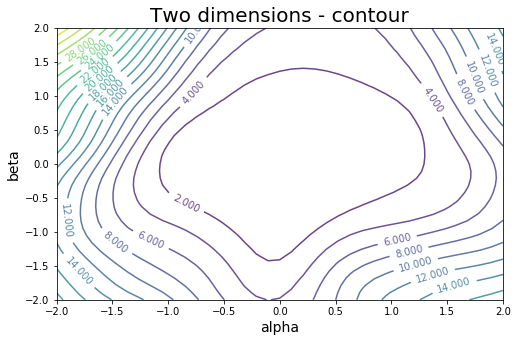

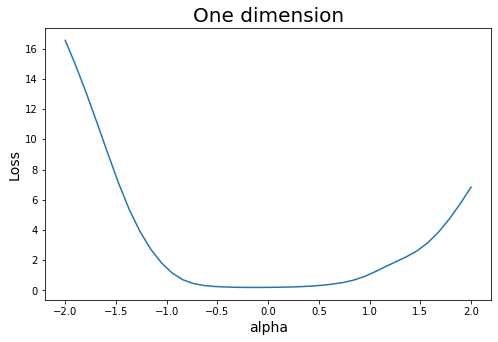

In [16]:
log_files_path = 'C:/Users/Yanxin Zhang/logs/'
            
#the input variables are first define as placeholder 
# a placeholder is a variable/data which will be assigned later 
# image vector & label
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

#defines a session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
act=['sigmoid', 'tanh', 'relu', 'sigmoid', 'leaky relu', 'sigmoid']

with tf.variable_scope("HW2_1b1", reuse=tf.AUTO_REUSE):
    #opt neural network definition
    #the network is defined using the inference function defined above in the code
    
    output_opt = inference(x,act)
    #compute the cost 
    cost_opt = loss_2(output_opt, y)
    var_list_opt = ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "hidden_layer_3/W", "hidden_layer_3/b",
                    "hidden_layer_4/W", "hidden_layer_4/b",
                    "hidden_layer_5/W", "hidden_layer_5/b",
                    "output/W", "output/b"]
    
    var_list_opt = [tf.get_variable(v) for v in var_list_opt]
    saver = tf.train.Saver(var_list_opt) 
    saver.restore(sess, log_files_path + 'HW2_1b1/model-checkpoint-108900')   
    
with tf.variable_scope("multi_layer_init_alpha", reuse=tf.AUTO_REUSE):
    #rand neural network definition 
    #the network is defined using the inference function defined above in the code
    output_rand_alpha = inference(x,act)
    #compute the rand cost
    cost_rand_alpha = loss_2(output_rand_alpha, y)
    
    var_list_rand_alpha = ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "hidden_layer_3/W", "hidden_layer_3/b",
                    "hidden_layer_4/W", "hidden_layer_4/b",
                    "hidden_layer_5/W", "hidden_layer_5/b",
                    "output/W", "output/b"]
    
    var_list_rand_alpha = [tf.get_variable(v) for v in var_list_rand_alpha]
    
    #initialization of the variables
    init_op = tf.variables_initializer(var_list_rand_alpha)
    
    sess.run(init_op)
#dictionary for the test dataset 
#used to evaluate accuracy 
feed_dict = {
        x: mnist.test.images,
        y: mnist.test.labels,
}

#compute the loss for opt and rand networks
print(sess.run([cost_opt, cost_rand_alpha], feed_dict=feed_dict))

with tf.variable_scope("multi_layer_init_beta", reuse=tf.AUTO_REUSE):
    #rand neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_rand_beta = inference(x,act)    
    #compute the rand cost
    cost_rand_beta = loss_2(output_rand_beta, y)
    
    var_list_rand_beta = ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "hidden_layer_3/W", "hidden_layer_3/b",
                    "hidden_layer_4/W", "hidden_layer_4/b",
                    "hidden_layer_5/W", "hidden_layer_5/b",
                    "output/W", "output/b"]
    
    var_list_rand_beta = [tf.get_variable(v) for v in var_list_rand_beta]
    
    #initialization of the variables
    init_op = tf.variables_initializer(var_list_rand_beta)
    
    sess.run(init_op)
#dictionary for the test dataset 
#used to evaluate accuracy 
feed_dict = {
        x: mnist.test.images,
        y: mnist.test.labels,
}

#compute the loss for opt and rand networks
print(sess.run([cost_opt, cost_rand_beta], feed_dict=feed_dict))


with tf.variable_scope("multi_layer_inter") as scope:
    #initialize the placeholder alpha coefficient 
    #a placeholder is a variable/data which will be assigned later 
    alpha = tf.placeholder("float", [1, 1])
    beta = tf.placeholder("float", [1, 1])
    cost_inter = cost_fn(var_list_opt,alpha,beta,act)
    tf.summary.scalar("interpolated_cost", cost_inter)

draw_surface(cost_inter)

### Architecture 2

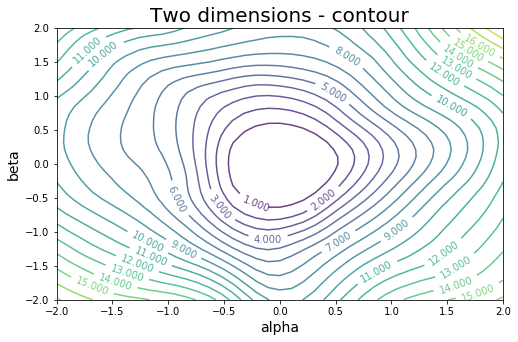

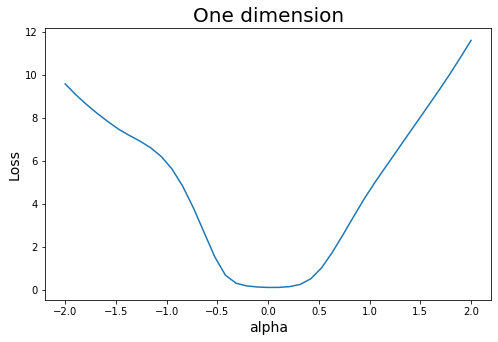

In [17]:
act=['tanh','relu','relu','tanh','leaky relu','sigmoid']
with tf.variable_scope("HW2_1b2", reuse=tf.AUTO_REUSE):
    #opt neural network definition
    #the network is defined using the inference function defined above in the code 
    output_opt = inference(x,act)
    #compute the cost 
    cost_opt = loss_2(output_opt, y)
    var_list_opt = ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "hidden_layer_3/W", "hidden_layer_3/b",
                    "hidden_layer_4/W", "hidden_layer_4/b",
                    "hidden_layer_5/W", "hidden_layer_5/b",
                    "output/W", "output/b"]
    
    var_list_opt = [tf.get_variable(v) for v in var_list_opt]
    saver = tf.train.Saver(var_list_opt) 
    saver.restore(sess, log_files_path + 'HW2_1b2/model-checkpoint-108900') 


with tf.variable_scope("multi_layer_inter_2",reuse=tf.AUTO_REUSE) as scope:    
    #initialize the placeholder alpha coefficient 
    alpha = tf.placeholder("float", [1, 1])
    beta = tf.placeholder("float", [1, 1])
    cost_inter = cost_fn(var_list_opt,alpha,beta,act)

draw_surface(cost_inter)

### Architecture 3

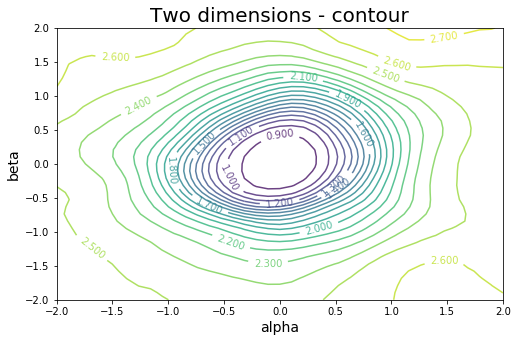

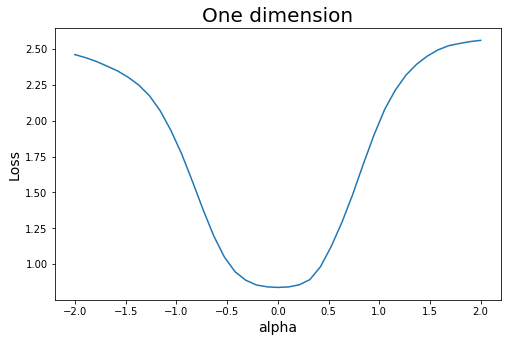

In [18]:
act= ['tanh','relu','tanh','relu','tanh','sigmoid']
with tf.variable_scope("HW2_1b3", reuse=tf.AUTO_REUSE):
    #opt neural network definition
    #the network is defined using the inference function defined above in the code 
    output_opt = inference(x,act)
    #compute the cost 
    cost_opt = loss_2(output_opt, y)
    var_list_opt = ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "hidden_layer_3/W", "hidden_layer_3/b",
                    "hidden_layer_4/W", "hidden_layer_4/b",
                    "hidden_layer_5/W", "hidden_layer_5/b",
                    "output/W", "output/b"]
    
    var_list_opt = [tf.get_variable(v) for v in var_list_opt]
    saver = tf.train.Saver(var_list_opt) 
    saver.restore(sess, log_files_path + 'HW2_1b3/model-checkpoint-108900') 


with tf.variable_scope("multi_layer_inter_3",reuse=tf.AUTO_REUSE) as scope:    
    #initialize the placeholder alpha coefficient 
    alpha = tf.placeholder("float", [1, 1])
    beta = tf.placeholder("float", [1, 1])
    cost_inter = cost_fn(var_list_opt,alpha,beta,act)

draw_surface(cost_inter)

#### b. Assessing the path traveled through the loss function having same architecture but using different optimization routine
#### - architecture1, SGD

Text(0, 0.5, 'Loss')

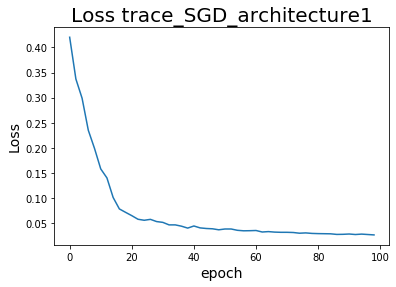

In [9]:
x=[i for i in range(training_epochs) if i%display_step == 0 ]
plt.plot(x,loss_trace_1b1)
plt.title('Loss trace_SGD_architecture1', fontsize=20)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

####  architecture1, adam

Text(0, 0.5, 'Loss')

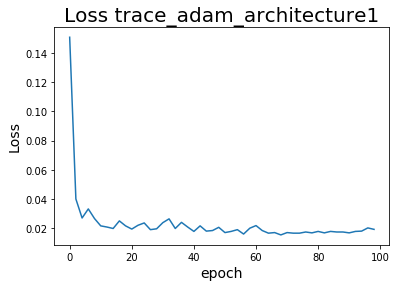

In [15]:
x=[i for i in range(training_epochs) if i%display_step == 0 ]
plt.plot(x,loss_trace_1c_adam_1)
plt.title('Loss trace_adam_architecture1', fontsize=20)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

####  architecture1, adadelta

Text(0, 0.5, 'Loss')

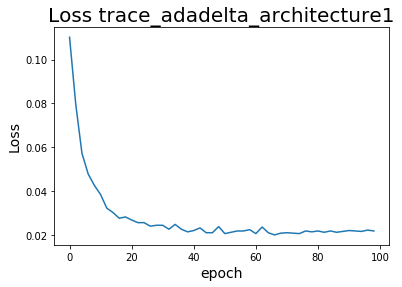

In [17]:
x=[i for i in range(training_epochs) if i%display_step == 0 ]
plt.plot(x,loss_trace_1c_adadelta_1)
plt.title('Loss trace_adadelta_architecture1', fontsize=20)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

####  architecture2, SGD

Text(0, 0.5, 'Loss')

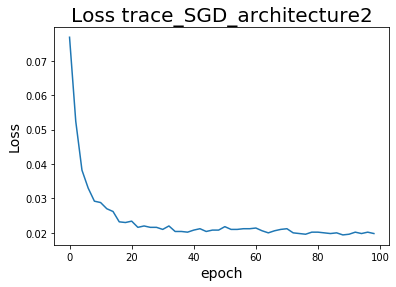

In [11]:
x=[i for i in range(training_epochs) if i%display_step == 0 ]
plt.plot(x,loss_trace_1b2)
plt.title('Loss trace_SGD_architecture2', fontsize=20)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

####  architecture2, adam

Text(0, 0.5, 'Loss')

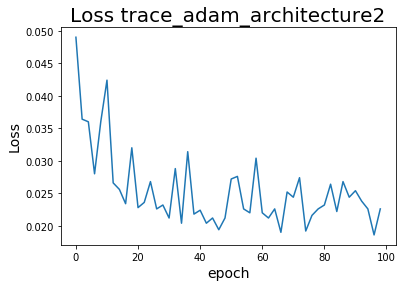

In [19]:
x=[i for i in range(training_epochs) if i%display_step == 0 ]
plt.plot(x,loss_trace_1c_adam_2)
plt.title('Loss trace_adam_architecture2', fontsize=20)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

####  architecture2, adadelta

Text(0, 0.5, 'Loss')

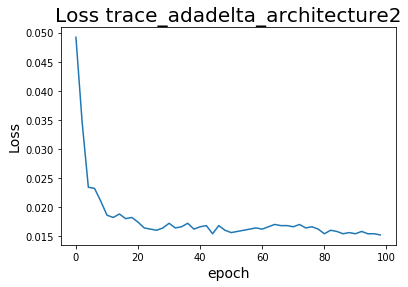

In [21]:
x=[i for i in range(training_epochs) if i%display_step == 0 ]
plt.plot(x,loss_trace_1c_adadelta_2)
plt.title('Loss trace_adadelta_architecture2', fontsize=20)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

Text(0, 0.5, 'Loss')

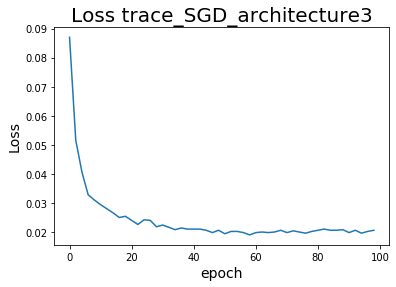

In [13]:
x=[i for i in range(training_epochs) if i%display_step == 0 ]
plt.plot(x,loss_trace_1b3)
plt.title('Loss trace_SGD_architecture3', fontsize=20)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

####  architecture3, adam

Text(0, 0.5, 'Loss')

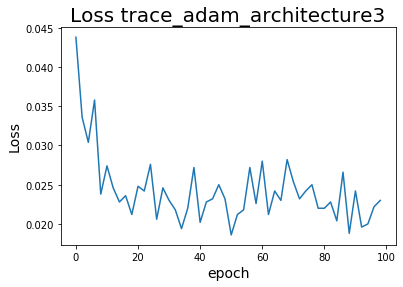

In [23]:
x=[i for i in range(training_epochs) if i%display_step == 0 ]
plt.plot(x,loss_trace_1c_adam_3)
plt.title('Loss trace_adam_architecture3', fontsize=20)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

####  architecture3, adadelta

Text(0, 0.5, 'Loss')

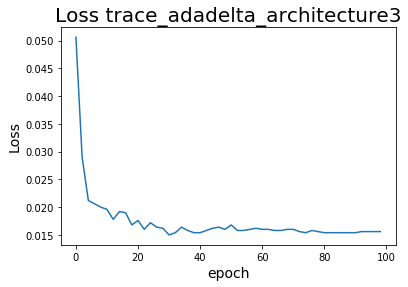

In [25]:
x=[i for i in range(training_epochs) if i%display_step == 0 ]
plt.plot(x,loss_trace_1c_adadelta_3)
plt.title('Loss trace_adadelta_architecture3', fontsize=20)
plt.xlabel('epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

#### As seen above,  in each architecture, different optimization routine give different trajectory. In our case, the trajectory of SGD tend to be more smooth and a little bit slower than the others. Adam is more fluctuated.